# Image Classification

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1054 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

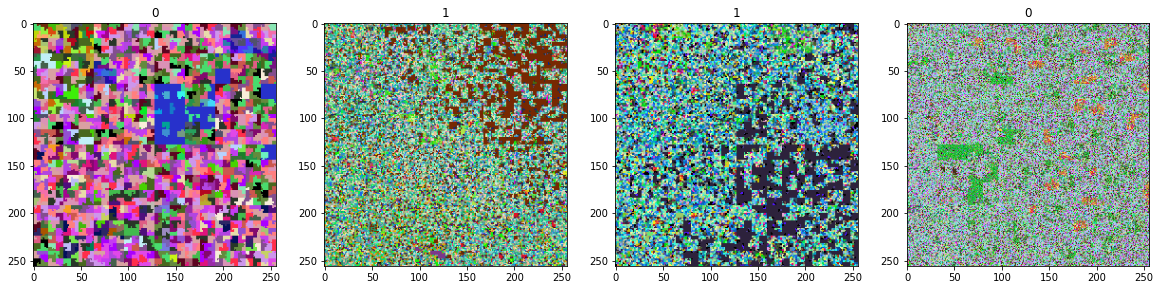

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.5372549 , 0.74509805, 0.41568628],
          [0.5372549 , 0.74509805, 0.41568628],
          [0.5372549 , 0.74509805, 0.41568628],
          ...,
          [0.57254905, 0.5254902 , 0.72156864],
          [0.57254905, 0.5254902 , 0.72156864],
          [0.57254905, 0.5254902 , 0.72156864]],
 
         [[0.5372549 , 0.74509805, 0.41568628],
          [0.5372549 , 0.74509805, 0.41568628],
          [0.28235295, 0.20784314, 0.1882353 ],
          ...,
          [0.57254905, 0.5254902 , 0.72156864],
          [0.56078434, 0.75686276, 0.64705884],
          [0.56078434, 0.75686276, 0.64705884]],
 
         [[0.9490196 , 0.9764706 , 0.44313726],
          [0.9490196 , 0.9764706 , 0.44313726],
          [0.28235295, 0.20784314, 0.1882353 ],
          ...,
          [0.2784314 , 0.8745098 , 0.5647059 ],
          [0.56078434, 0.75686276, 0.64705884],
          [0.56078434, 0.75686276, 0.64705884]],
 
         ...,
 
         [[0.74509805, 0.8901961 , 0.5137255 ],
          [0.74509

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train_size

23

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 157s 4s/step - loss: 1.0170 - accuracy: 0.5095 - val_loss: 0.6835 - val_accuracy: 0.6042
Epoch 2/20
23/23 [==============================] - 11s 439ms/step - loss: 0.6607 - accuracy: 0.6454 - val_loss: 0.5802 - val_accuracy: 0.7604
Epoch 3/20
23/23 [==============================] - 13s 553ms/step - loss: 0.5911 - accuracy: 0.6889 - val_loss: 0.5856 - val_accuracy: 0.6979
Epoch 4/20
23/23 [==============================] - 11s 479ms/step - loss: 0.5666 - accuracy: 0.7201 - val_loss: 0.5504 - val_accuracy: 0.7135
Epoch 5/20
23/23 [==============================] - 18s 772ms/step - loss: 0.5223 - accuracy: 0.7772 - val_loss: 0.5726 - val_accuracy: 0.6823
Epoch 6/20
23/23 [==============================] - 11s 486ms/step - loss: 0.5003 - accuracy: 0.8057 - val_loss: 0.5254 - val_accuracy: 0.7292
Epoch 7/20
23/23 [==============================] - 12s 502ms/step - loss: 0.4033 - accuracy: 0.8315 - val_loss: 0.3759 - val_accuracy: 0.8542
E

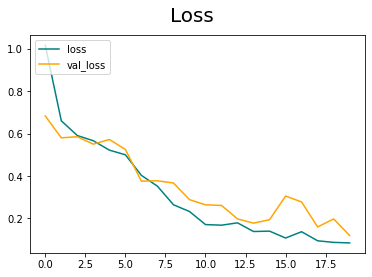

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

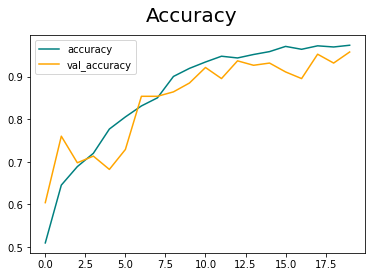

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 48ms/step


In [26]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.96153843, shape=(), dtype=float32) tf.Tensor(0.96153843, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32)


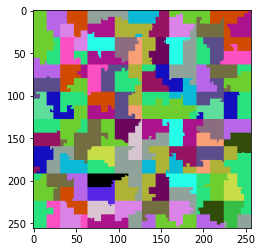

In [27]:
img = cv2.imread('bad-4.png')
plt.imshow(img)
plt.show()

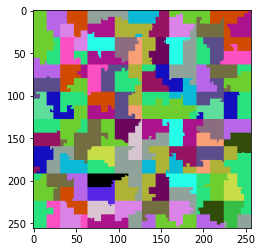

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 504ms/step


In [30]:
yhat

array([[0.00866664]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class is Good')
else:
    print(f'Predicted class is Bad')

Predicted class is Bad
